In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  err = np.sum(err)
  return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

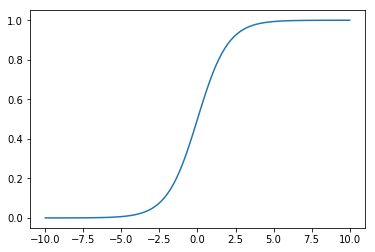

In [13]:
plt.plot(z, probabilities)

In [14]:
### Logistic Regression

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [16]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846553
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


In [17]:
# 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [18]:
def calc_logloss(y, y_pred):
  f = np.vectorize(lambda x: 0.000001 if x < 0.000001 else 0.999999 if x > 0.999999 else x)
  y_pred1 = f(y_pred)
  err = - np.mean(y * np.log(y_pred1) + (1.0 - y) * np.log(1.0 - y_pred1))
  err = np.sum(err)
  return err

In [19]:
yt0 = np.array([0,1,0,1])
yp0 = np.array([0,1,0,1])
calc_logloss(yt0, yp0)

1.000000500029089e-06

In [20]:
# 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [21]:
W = eval_model(X_st, y, iterations=220, alpha=1000)

22 [-689.21547686  -83.00694608 1419.70257681 2525.05145203] 8.289306734775888
44 [-1489.21547686 -1083.00694608  1491.88286971  4025.05145203] 6.907755778979511
66 [-2381.71651753 -1475.61372359  1162.74445132  4332.49753605] 3.291004718025696
88 [-3016.71990357 -1110.61321696   471.2328762   4497.49501505] 2.763102911590379
110 [-3616.39596014 -1210.28927353   -96.14852206  4797.81895848] 2.763102911590379
132 [-4128.75532858 -1022.64864197  -232.28330055  5485.45959004] 6.907755778982387
154 [-4828.75538716 -1222.64871441  -381.79958608  5685.45952453] 5.526204823186009
176 [-5728.00066963 -2019.00108679 -1128.62899495  4687.6606971 ] 6.907755778968008
198 [-5828.00072901 -1119.00114606  -968.8011453   5587.66063774] 2.763102911590379
220 [-6127.9869592   -818.98737624 -1355.49665553  5487.67440756] 2.8746146885667812e-05


In [22]:
# 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 
# (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [23]:
def calc_pred_proba(W, X):
  z = np.dot(W, X)
  yp = sigmoid(z)
  return yp

In [24]:
calc_pred_proba(W, X_st)

array([8.00891506e-058, 1.24558011e-300, 1.00000000e+000, 3.15844033e-179,
       1.00000000e+000, 2.36030921e-066, 1.00000000e+000, 0.00000000e+000,
       9.99752105e-001, 1.00000000e+000])

In [25]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [26]:
# 4. Создайте функцию calc_pred, возвращающую предсказанный класс 
# (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [27]:
def calc_pred(W, X, threshold=0.5):
    f = np.vectorize(lambda x: 0 if x < threshold else 1)
    yp = calc_pred_proba(W, X)
    y_pred = f(yp)
    return y_pred

In [28]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [29]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [30]:
# 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [31]:
from sklearn.metrics import *

In [32]:
accuracy_score(y, y_pred)

1.0

In [33]:
precision_score(y, y_pred)

1.0

In [34]:
recall_score(y, y_pred)

1.0

In [35]:
f1_score(y, y_pred)

1.0

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [37]:
# 6. Могла ли модель переобучиться? Почему?

In [38]:
W

array([-6127.9869592 ,  -818.98737624, -1355.49665553,  5487.67440756])

In [39]:
# Получена переобученная модель с высокими значениями весов, т.к. не использовалась регуляризация.

In [40]:
# 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [41]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [42]:
W = eval_model_l2(X_st, y, iterations=1000, alpha=100, lambda_=1e-5)

100 [-645.87227006 -275.29624854   43.43120731  882.28735123] 2.763102911590379
200 [-1117.54922213  -437.79980314  -168.56966647  1014.49620747] 5.528427045108121
300 [-1094.73513927  -149.79960848  -235.03286789   999.37220829] 1.2447888621745042e-05
400 [-990.41228282 -135.33841522 -212.83426698  904.31960047] 2.2385575402418685e-05
500 [-896.14144191 -122.17774891 -192.76205927  818.19708697] 4.3436935418544905e-05
600 [-811.00093916 -110.1317817  -174.64883675  740.11909926] 7.512810269661032e-05
700 [-734.08660462  -99.08086172 -158.34012742  669.35462538] 0.00011640008494286963
800 [-664.5858307   -89.02242202 -143.63372121  605.23677314] 0.00018033754772139122
900 [-601.75669571  -79.9596982  -130.36703642  547.16882447] 0.0002949694339567581
1000 [-544.94423994  -71.84291935 -118.44956832  494.59454833] 0.0004937600526619796


In [43]:
y_pred = calc_pred(W, X_st)
y_pred, y

(array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [44]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [45]:
W = eval_model_l1(X_st, y, iterations=1000, alpha=100, lambda_=1e-5)

100 [-749.99797007 -451.28476697   40.41395192  792.45188054] 6.907755778968008
200 [-1188.04031494  -205.82307057  -216.63589418  1073.00840571] 2.763102911587503
300 [-1198.80673343  -164.36475142  -273.2144529   1082.0419919 ] 1.0382836416557184e-06
400 [-1198.70866841  -164.26666099  -273.11266061  1081.94005691] 1.0375258065928706e-06
500 [-1198.61057381  -164.16854199  -273.01089809  1081.83815152] 1.036788116593408e-06
600 [-1198.51244995  -164.07039469  -272.90916505  1081.73627538] 1.0360701266233806e-06
700 [-1198.41429714  -163.97221938  -272.80746121  1081.63442819] 1.0353714084798655e-06
800 [-1198.31611569  -163.87401632  -272.70578632  1081.53260964] 1.0346915500804237e-06
900 [-1198.2179059   -163.77578577  -272.60414012  1081.43081943] 1.0340301547636566e-06
1000 [-1198.11966805  -163.67752798  -272.50252235  1081.32905728] 1.0333868405786614e-06


In [46]:
y_pred = calc_pred(W, X_st)
y_pred, y

(array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))